### CS 559 WS Group 3 

Citations: Chatgpt4 for assistance and debugging

### P{art 1: Training Data and Preperation

In [14]:
import pandas as pd

# Load the dataset
file_path = 'data/train_data.csv'
data = pd.read_csv(file_path)
print(data.head())  # Display the first few rows of the dataset to understand its structure


   Index  Bankrupt?   ROA(C) before interest and depreciation before interest  \
0      0          0                                           0.450397          
1      1          0                                           0.530005          
2      2          0                                           0.571150          
3      3          0                                           0.483401          
4      4          0                                           0.510359          

    ROA(A) before interest and % after tax  \
0                                 0.504034   
1                                 0.572885   
2                                 0.620148   
3                                 0.556694   
4                                 0.537287   

    ROA(B) before interest and depreciation after tax  \
0                                           0.506986    
1                                           0.574763    
2                                           0.624177    
3       

##### Analyzing Feature Importance, Feature Engineering and Reduction

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest

# Separate features and the target
X = data.iloc[:, 2:]  # assuming the first two columns are index and target
y = data['Bankrupt?']

# Scale features (important for logistic regression)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection using RFE with Logistic Regression
logreg = LogisticRegression()
rfe = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')
rfe.fit(X_scaled, y)

# Select features according to the RFE
selected_features_rfe = X.columns[rfe.support_]

# Further selection using Chi-Squared Test
chi2_selector = SelectKBest(chi2, k=min(50, len(selected_features_rfe)))  # Adjust the number of features as needed
X_kbest_features = chi2_selector.fit_transform(X_scaled[:, rfe.support_], y)
selected_features_final = selected_features_rfe[chi2_selector.get_support()]

# Print and save the selected features
print("Selected features:", selected_features_final)
print("Number of final features selected:", len(selected_features_final))

# Save the filtered dataset
selected_indices = [list(X.columns).index(feat) for feat in selected_features_final]
X_filtered = X.iloc[:, selected_indices]
X_filtered['Bankrupt?'] = y  # reattach the target column
X_filtered.to_csv('data/filtered_train_data.csv', index=False)
print("Filtered data saved successfully.")

C:\Users\Ahanc\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ahanc\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Selected features: Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Long-term fund suitability ratio (A)',
       ' Borrowing dependency', ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital', ' Total Asset Turnover',
       ' Fixed Assets Turnover Frequency', ' Revenue per person',
       ' Operating profit per person', ' Working Capital to Total Assets',
       ' Quick Assets/Total Assets', ' Cash/Total Assets',
       ' Cash/Current Liability', ' Current Liability to Assets',
       ' Total expense/Assets', ' Cash Turnover Ra

C:\Users\Ahanc\AppData\Local\Temp\ipykernel_19816\3083240431.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_filtered['Bankrupt?'] = y  # reattach the target column


### Part 2: Clustering

C:\Users\Ahanc\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


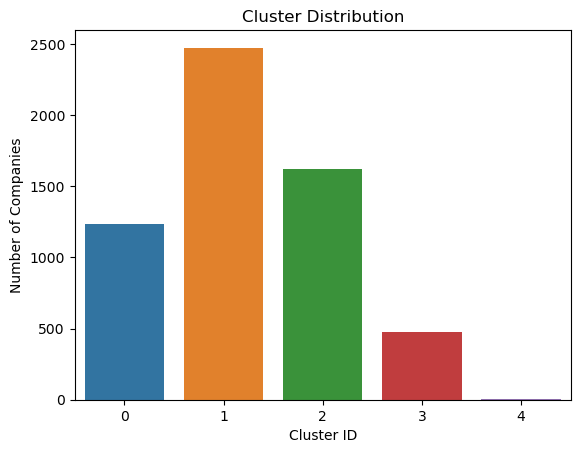

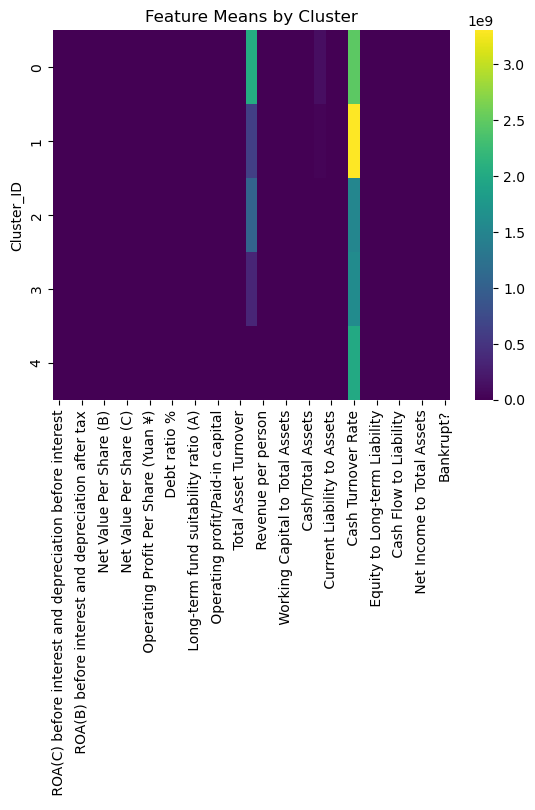

In [21]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "data/filtered_train_data.csv"  # Update this path
data = pd.read_csv(data_path)

# Drop the target variable for clustering
data_clustering = data.drop(['Bankrupt?'], axis=1)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

# Set the number of clusters (at least as many as team members)
k = 5  # Update based on your team size or a different choice

# KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_scaled)

# Gaussian Mixture
gm = GaussianMixture(n_components=k, random_state=42)
clusters_gm = gm.fit_predict(data_scaled)

# Add cluster ID back to the dataframe for analysis
data['Cluster_ID'] = clusters_kmeans  # or use clusters_gm

# Analyze cluster distribution
sns.countplot(x='Cluster_ID', data=data)
plt.title('Cluster Distribution')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Companies')
plt.show()

# Analyze mean feature values per cluster
cluster_means = data.groupby('Cluster_ID').mean()
sns.heatmap(cluster_means, cmap='viridis')
plt.title('Feature Means by Cluster')
plt.show()

data.to_csv('data/clustered_data.csv', index=False)
